<a href="https://colab.research.google.com/github/fjg00/TensorFlow-Course/blob/master/Tensorflow_Github_Workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We are using an NN-Based project, we will need to use tensorflow. Tensorflow is a general tool for the manipulation of mathematical entities called ***tensors***.
NNs are a single use of tenors.


**Keras** acts as a high-level API (Application Programmming Interface) which allows users to easily **generate, define and manipulate structures** within Tensorflow.

In [1]:
import numpy
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras


We will be doing a simple 6:1 ratio of training: testing

We first load in the dataset from the keras package. We assigned the name fashion_mist to a dataset located within Keras' dataset library.



In [2]:
fashion_mnist = keras.datasets.fashion_mnist

We define 4 arrays that contain the training and testing data which are separated into labels and images.

**Important:**

Training data arrays are used to train the model

Testing arrays allow us to evaluate the performance of the model.


In [3]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


We will use matplotlib to visualize an example of our dataset

In [4]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

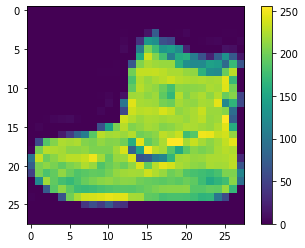

In [5]:
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

The greyscale assigned to each pixel has a value in the range of 0-255

We want to flatten it to a value in the range of 0-1.

Each image is stored as a 2D array where each numerical value is the grayscale value of a particuar pixel.

To a get a range of 0-1, we will divide the entire array by a number to get an array whose elements are "normalized".

In [6]:
train_images = train_images / 255.0
test_images = test_images/255.0

**MODEL GENERATION**

Every NN is composed of connected layers which are full of connection nodes.

Our model is formed of 3 layers.

1. Input layer

    *  Flatten layer
    *  Intakes a multi-dimensional array
    *  Produces an array of a single dimension
    *  Places all the pixel data on an equal depth during input

Layers 2 & 3 are dense layers.

2. Layer 2: 128 Nodes
    * Features a Rectified Linear Unit (ReLU) Activation Function that outputs values between zero and 1

3. Layer 3: 10 nodes 
    * Uses the softmax activation function. 
    * Produces values in the 0-1 range,  
    * The sum of the outputs will be 1! 
    * Excellent at outputting probabilities.


**Important**


*Activation Functions*

Each layer can have its own particular mathematical operation. These are typically referred to as the activation functions.

determine the form and relationship between the information provided by the layer. 

In [7]:
 model = keras.Sequential([ keras.layers.Flatten(input_shape=(28,28)), keras.layers.Dense(128, activation=tf.nn.relu), keras.layers.Dense(10, activation=tf.nn.softmax)])

**Training the Model**

When compiling we should define:

1. *Parameters* that control how models are updated during training (optimizer)
2. How the model's *accuracy* is measured *during training* (loss function)
3. What is to be measured to *determine *the model's accuracy (metrics). 


In [8]:
model.compile( optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

We generated and compiled the model.
We can train it now!

**train_images**: input data

 *Recall*: our input Flatten layer takes a (28,28) array, conforming to the dimensionality of our images.

**train_labels**: Providing the correct classification for all the training examples.

**epochs**: a training cycle over all the training data. 

Model will be trained overall 60,000 training examples 5 times.

 After each epoch, we get both the value of the loss function and the model's accuracy (88.97% after epoch 5) at this epoch.

In [9]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6366 - accuracy: 0.7815
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3805 - accuracy: 0.8643
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3464 - accuracy: 0.8729
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3161 - accuracy: 0.8842
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2979 - accuracy: 0.8900


**Evaluating our model**

We built a Neural Network which intakes a (28,28) array, flattens it into a 784 array,  we compiled and trained 2 dense layers.

**Softmax activation function** of the final output layer will provide a probability that the image belongs to each of the 10 label categories.


**Model.evaluate function**
   * takes in the images and labels 
   * compares its predictions to the ground truth provided by the labels. 
   * provides two outputs:
       - the value of the loss function over the testing example4
       - the accuracy of the model over this testing population. 
       
The important output for us is the model's accuracy.


In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.3485 - accuracy: 0.8750


Overfitting // learning the data too well

Overfitting occurs when there are too many parameters within the model when compared to the number of training instances; this allows the model to **over learn on those limited examples.** Overfitting leads to better model performance over non-training data.


In [13]:
predictions[0]

array([5.43273927e-07, 6.60212507e-09, 2.95308809e-08, 9.44192724e-10,
       4.84006968e-08, 1.30316075e-02, 5.20549122e-07, 1.22808721e-02,
       6.63880201e-07, 9.74685669e-01], dtype=float32)

In [14]:
numpy.argmax(predictions[0])

9

In [15]:
test_labels[0]

9